# CA04: Ensemble Models

<i>
Dani Le, Efren Lopez, Luis Otero
<br>
BSAN 6070
<br>
March 5, 2024
<br>
</i>

GitHub Links:
*   Dani: https://github.com/ledani-bu/ml
*   Efren: https://github.com/efrenlop01/
*   Luis: https://github.com/otero106/BSAN6070

## Table of Contents
* [Project Overview](#overview)
* [Python Implementation](#python)
    * [Data Source and Contents](#part1)
    * [Building a Random Forest Model](#part2)
    * [Building AdaBoost, Gradient Boost, and XGB](#part3)
    * [Compare Performance](#part4)

## Project Overview <a class="anchor" id="overview"></a>

In this Python project, we will be merging predictions from multiple machine learning algorithms on a salary dataset obtained from the Census Bureau. This method in data science is called ensemble learning, with the ultimate goal being to produce one optimal predictive model. By splitting the dataset into multiple subsets and implementing an algorithm on each subset, this will hopefully enhance the overall accuracy of the "best" algorithm by mitigating error and bias.

The dataset contains eleven columns with nine demographic variables, one indicating whether the row is to be used in the training or test set, and one target class (0 or 1). The target variable indicates whether the person has a salary that is greater than 50K or less than 50K. We will first load and clean the data, determine the most optimal number of estimators and build several classifier models such as Random Forest, AdaBoost, Gradient Boost and XGB.

## Python Implementation <a class="anchor" id="python"></a>

### Part 1: Data Source and Contents <a class="anchor" id="part1"></a>

#### Loading Modules and Data

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

In [2]:
#loading data
data = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

#brief summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [3]:
#looking at first five rows
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


#### Data Pre-Processing

In [4]:
#create a copy of the data
data_copy = data.copy()

#store column headers in list
col_list = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin']

#get rid of first 3 characters
for col in col_list:
    data_copy[col] = data_copy[col].str[3:]

data_copy.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [5]:
#create dummy variables for every categorical column
data_dummies = pd.get_dummies(data_copy, columns=col_list, drop_first=True)

#see new columns
data_dummies.head()

,flag,y,hours_per_week_bin_31-40,hours_per_week_bin_41-50 & 61-70,hours_per_week_bin_51-60,hours_per_week_bin_71-100,occupation_bin_Low,occupation_bin_Mid - High,occupation_bin_Mid - Low,occupation_bin_Mid - Mid,...,education_num_bin_9-12,education_bin_High,education_bin_Low,education_bin_Masters,education_bin_Mid,workclass_bin_no income,age_bin_26-30 & 71-100,age_bin_31-35 & 61-70,age_bin_36-40 & 56-60,age_bin_40-55
0,train,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,train,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,train,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,train,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,train,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Creating Training and Test Sets

In [6]:
#split the data into traininig and testing sets using 'flag' column
train = data_dummies[data_dummies['flag'] == 'train']
test = data_dummies[data_dummies['flag'] == 'test']

#shuffle rows in both sets and keep the same index
train = train.sample(frac=1, random_state = 1971).reset_index(drop=True)
test = test.sample(frac=1, random_state = 1971).reset_index(drop=True)

#drop 'flag' column from both train and test sets
train.drop('flag', axis=1, inplace=True)
test.drop('flag', axis=1, inplace=True)

print("Number of rows in training set:", train.shape[0])
print("Number of rows in test set:", test.shape[0])

Number of rows in training set: 32561
Number of rows in test set: 16281


In [7]:
#split the training set into features and target variable
x_train = train.drop('y', axis=1)
y_train = train['y']

#split the test set into features and target variable
x_test = test.drop('y', axis=1)
y_test = test['y']

#see first five rows of new datasets
print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

   hours_per_week_bin_31-40  hours_per_week_bin_41-50 & 61-70  \
0                         1                                 0   
1                         1                                 0   
2                         0                                 1   
3                         0                                 0   
4                         1                                 0   

   hours_per_week_bin_51-60  hours_per_week_bin_71-100  occupation_bin_Low  \
0                         0                          0                   0   
1                         0                          0                   0   
2                         0                          0                   0   
3                         0                          0                   0   
4                         0                          0                   0   

   occupation_bin_Mid - High  occupation_bin_Mid - Low  \
0                          0                         0   
1                       

### Part 2: Building a Random Forest Model <a class="anchor" id="part2"></a>

Now that the data is ready for modelling, we will now construct a random forest model, which is the first ensemble model we will build and test. Random forest is a bagging or boostrapping aggregation algorithm, where multiple samples of the given data are created and a decision tree is constructed at the end of each data subset. The algorithm randomly selects a number of features from the subset of data and creates a specified number of random trees, which are then aggregated at the end. This minimizes overfitting and reduces variance as one decision tree learns from the error produced by the previous tree. In order to find the most accurate model, we will build several random forest classifiers to find which estimator (number of trees) is the most optimal.

#### Accuracy vs. Number of Estimators

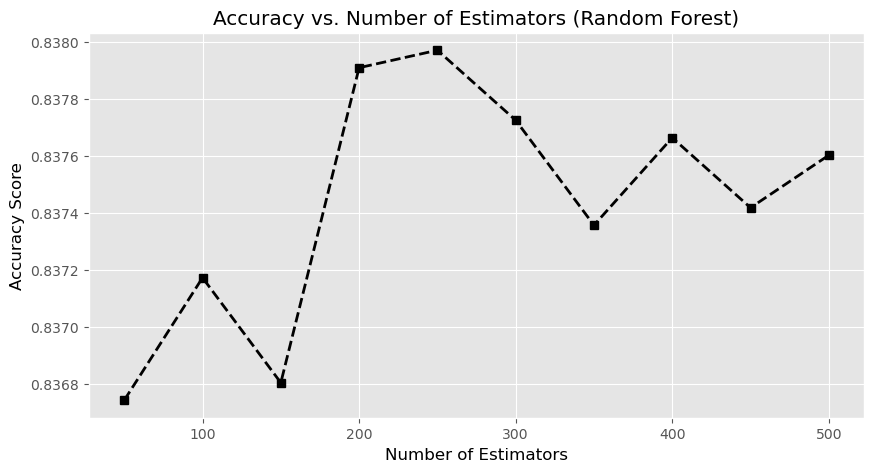

In [8]:
#list of estimators
estimators = [50,100,150,200,250,300,350,400,450,500]

#empty list to store accuracy scores
accuracy_results = []
auc_results = []

#loop through the list of estimators
for n in estimators:

    #create a random forest classifier with n estimators
    rf = RandomForestClassifier(n_estimators = n, random_state = 100)

    #fit the model on the training set
    rf.fit(x_train, y_train)
    #predict the target variable on the test set
    y_pred = rf.predict(x_test)

    #calculate auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #calculate and add scores to lists
    accuracy_results.append(accuracy_score(y_test, y_pred))
    auc_results.append(auc(fpr, tpr))

results = [accuracy_results, auc_results]

#plot the accuracy scores
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
pd.Series(accuracy_results, estimators).plot(color = 'black', marker = 's', linestyle = '--', linewidth = 2)
plt.title('Accuracy vs. Number of Estimators (Random Forest)', color = 'black')
plt.xlabel('Number of Estimators', color = 'black')
plt.ylabel('Accuracy Score', color = 'black')
plt.show()

#### AUC vs. Number of Estimators

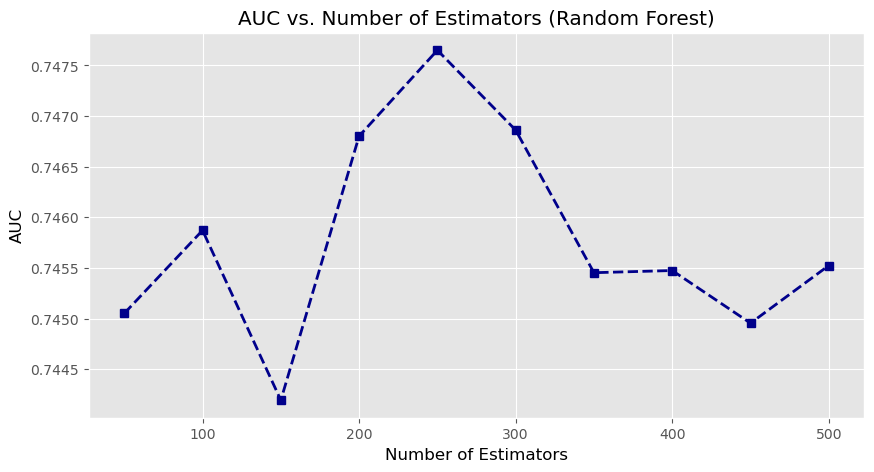

In [9]:
#plot the auc scores
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
pd.Series(auc_results, estimators).plot(color = 'darkblue', marker = 's', linestyle = '--', linewidth = 2)
plt.title('AUC vs. Number of Estimators (Random Forest)', color = 'black')
plt.xlabel('Number of Estimators', color = 'black')
plt.ylabel('AUC', color = 'black')
plt.show()

In [10]:
#store max accuracy and auc scores
max_rf = [max(accuracy_results), max(auc_results)]
print("Max Accuracy:", max(accuracy_results), "Max AUC:", max(auc_results))

#print results
rf_results = pd.DataFrame(results, columns = estimators, index = ['Accuracy', 'AUC'])
rf_results

Max Accuracy: 0.8379706406240403 Max AUC: 0.7476505598221517


,50,100,150,200,250,300,350,400,450,500
Accuracy,0.836742,0.837172,0.836804,0.837909,0.837971,0.837725,0.837356,0.837664,0.837418,0.837602
AUC,0.745050,0.745871,0.744193,0.746802,0.747651,0.746861,0.745453,0.745474,0.744954,0.745524


#### Results

1. The least accurate random forest model was the first, which had 50 trees, while the one with the least AUC was 150 trees. It appears that after a random forest model with 150 trees is built, the performance of the following classifiers deteriorates in terms of accuracy and AUC. Overall, accuracy across all models stayed around 83.7% and auc averaged around 0.74.

2. The most optimal value is 250 with an accuracy score of approximately 0.838 and an AUC score of 0.7469.

### Part 3: Building AdaBoost, Gradient Boost, and XGB <a class="anchor" id="part3"></a>

We will now implement other ensemble models: AdaBoost, Gradient Boost, and XGBoost. However, instead of the bagging technique, the aforementioned algorithms are built on the boosting technique. While bagging aims to lessen variance, boosting aims to reduce bias by consecutively fitting multiple weak models on dataset observations that were mishandled by earlier models. We will be utilizing the same process to determine the optimal number of estimators for each ensemble learning algorithm.

#### AdaBoost

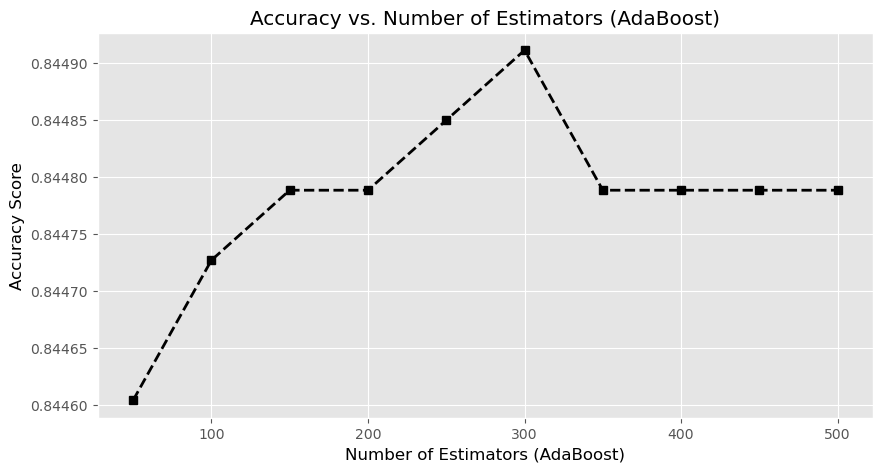

In [11]:
#empty list to store accuracy scores
accuracy_results = []
auc_results = []

#loop through the list of estimators
for n in estimators:

    #create AdaBoost with n estimators
    ab = AdaBoostClassifier(n_estimators = n, random_state = 100)

    #fit the model on the training set
    ab.fit(x_train, y_train)
    #predict the target variable on the test set
    y_pred = ab.predict(x_test)

    #calculate auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #calculate and add scores to lists
    accuracy_results.append(accuracy_score(y_test, y_pred))
    auc_results.append(auc(fpr, tpr))

results = [accuracy_results, auc_results]

#plot the accuracy scores
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
pd.Series(accuracy_results, estimators).plot(color = 'black', marker = 's', linestyle = '--', linewidth = 2)
plt.title('Accuracy vs. Number of Estimators (AdaBoost)', color = 'black')
plt.xlabel('Number of Estimators (AdaBoost)', color = 'black')
plt.ylabel('Accuracy Score', color = 'black')
plt.show()

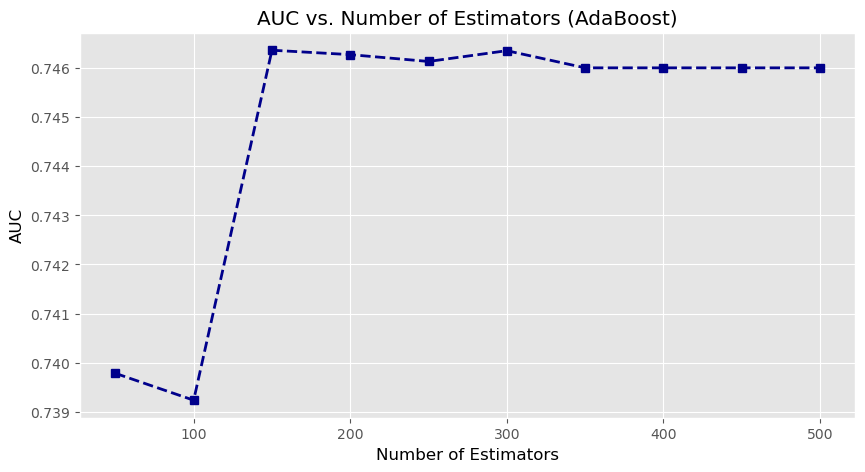

In [12]:
#plot the auc scores
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
pd.Series(auc_results, estimators).plot(color = 'darkblue', marker = 's', linestyle = '--', linewidth = 2)
plt.title('AUC vs. Number of Estimators (AdaBoost)', color = 'black')
plt.xlabel('Number of Estimators', color = 'black')
plt.ylabel('AUC', color = 'black')
plt.show()

In [13]:
#store max accuracy and auc scores
max_ab = [max(accuracy_results), max(auc_results)]
print("Max Accuracy:", max(accuracy_results), "Max AUC:", max(auc_results))

#print results
ab_results = pd.DataFrame(results, columns = estimators, index = ['Accuracy', 'AUC'])
ab_results

Max Accuracy: 0.8449112462379461 Max AUC: 0.7463668172782401


,50,100,150,200,250,300,350,400,450,500
Accuracy,0.844604,0.844727,0.844788,0.844788,0.844850,0.844911,0.844788,0.844788,0.844788,0.844788
AUC,0.739781,0.739233,0.746367,0.746277,0.746138,0.746357,0.746008,0.746008,0.746008,0.746008


1. The least accurate AdaBoost model was the first while the one with the least AUC was 100 trees. It appears that after a AdaBoost model with 150 trees is built, the performance of the ensemble models that followed stayed relatively the same in terms of accuracy. The auc across the models stayed the same from 150 to 500.

2. We could not find a most optimal value as the best accuracy and best auc were given by different estimator values. Highest accuracy was 0.8449 at 300 estimators and the highest auc was 0.746367 at 150 estimators.

#### Gradient Boost

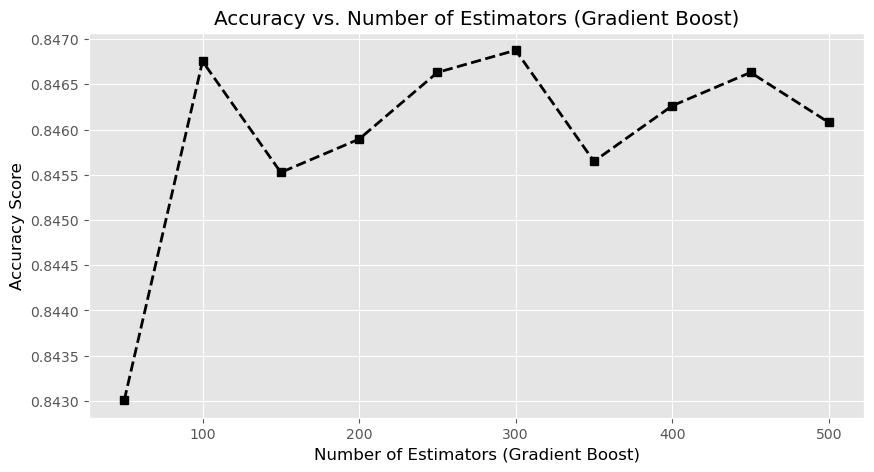

In [14]:
#empty list to store accuracy scores
accuracy_results = []
auc_results = []

#loop through the list of estimators
for n in estimators:

    #create AdaBoost with n estimators
    gr = GradientBoostingClassifier(n_estimators = n, random_state = 100)

    #fit the model on the training set
    gr.fit(x_train, y_train)
    #predict the target variable on the test set
    y_pred = gr.predict(x_test)

    #calculate auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #calculate and add scores to lists
    accuracy_results.append(accuracy_score(y_test, y_pred))
    auc_results.append(auc(fpr, tpr))

results = [accuracy_results, auc_results]

#plot the accuracy scores
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
pd.Series(accuracy_results, estimators).plot(color = 'black', marker = 's', linestyle = '--', linewidth = 2)
plt.title('Accuracy vs. Number of Estimators (Gradient Boost)', color = 'black')
plt.xlabel('Number of Estimators (Gradient Boost)', color = 'black')
plt.ylabel('Accuracy Score', color = 'black')
plt.show()

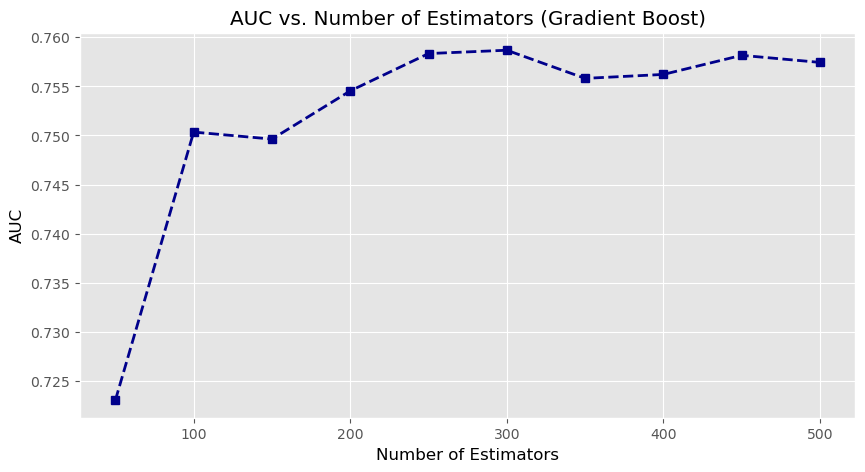

In [15]:
#plot the auc scores
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
pd.Series(auc_results, estimators).plot(color = 'darkblue', marker = 's', linestyle = '--', linewidth = 2)
plt.title('AUC vs. Number of Estimators (Gradient Boost)', color = 'black')
plt.xlabel('Number of Estimators', color = 'black')
plt.ylabel('AUC', color = 'black')
plt.show()

In [17]:
#store max accuracy and auc scores
max_gr = [max(accuracy_results), max(auc_results)]
print("Max Accuracy:", max(accuracy_results), "Max AUC:", max(auc_results))

#print results
gr_results = pd.DataFrame(results, columns = estimators, index = ['Accuracy', 'AUC'])
gr_results

Max Accuracy: 0.8468767274737424 Max AUC: 0.7586890520252897


,50,100,150,200,250,300,350,400,450,500
Accuracy,0.843007,0.846754,0.845525,0.845894,0.846631,0.846877,0.845648,0.846263,0.846631,0.846078
AUC,0.723021,0.750347,0.749633,0.754544,0.758349,0.758689,0.755820,0.756222,0.758169,0.757448


1. The Gradient Boost model with the least accuracy and auc was the first with 50 estimators. From 200 to 500 trees, the auc scores stayed around 0.755. 100 was very close to being the most accurate Gradient Boost model.

2. The most optimal value is 300 with an accuracy score of approximately 0.8469 and an AUC score of 0.7587.

#### XGB

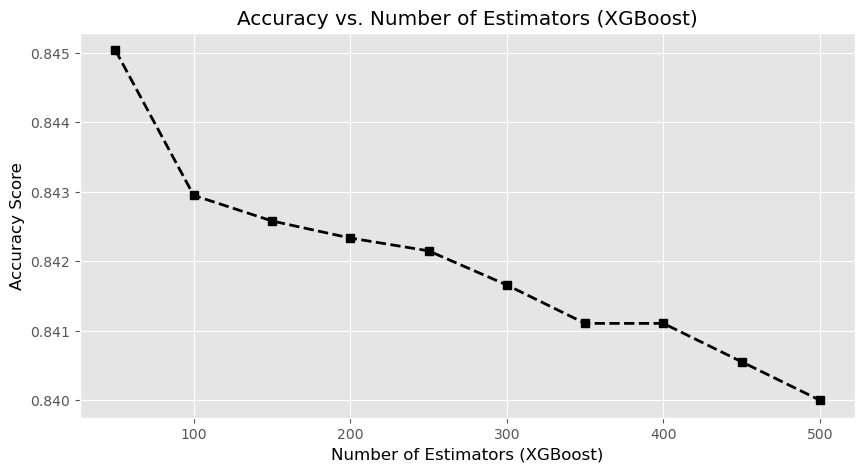

In [18]:
#empty list to store accuracy scores
accuracy_results = []
auc_results = []

#loop through the list of estimators
for n in estimators:

    #create AdaBoost with n estimators
    xg = XGBClassifier(n_estimators = n, random_state = 100)

    #fit the model on the training set
    xg.fit(x_train, y_train)
    #predict the target variable on the test set
    y_pred = xg.predict(x_test)

    #calculate auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #calculate and add scores to lists
    accuracy_results.append(accuracy_score(y_test, y_pred))
    auc_results.append(auc(fpr, tpr))

results = [accuracy_results, auc_results]

#plot the accuracy scores
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
pd.Series(accuracy_results, estimators).plot(color = 'black', marker = 's', linestyle = '--', linewidth = 2)
plt.title('Accuracy vs. Number of Estimators (XGBoost)', color = 'black')
plt.xlabel('Number of Estimators (XGBoost)', color = 'black')
plt.ylabel('Accuracy Score', color = 'black')
plt.show()

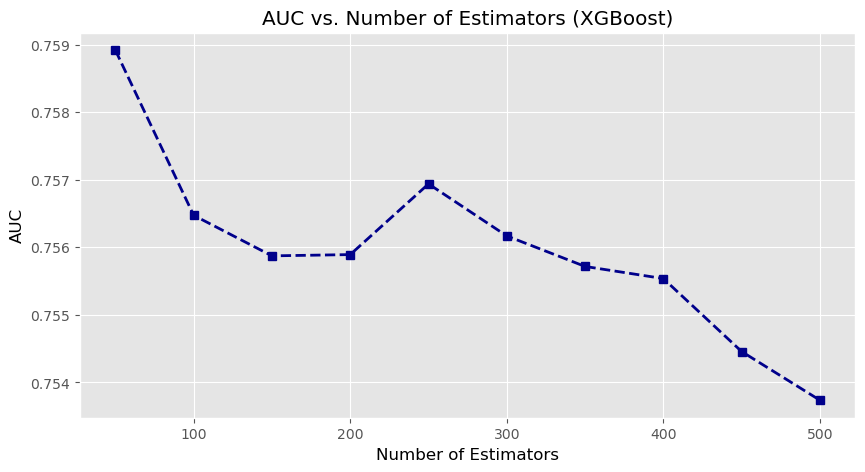

In [19]:
#plot the auc scores
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
pd.Series(auc_results, estimators).plot(color = 'darkblue', marker = 's', linestyle = '--', linewidth = 2)
plt.title('AUC vs. Number of Estimators (XGBoost)', color = 'black')
plt.xlabel('Number of Estimators', color = 'black')
plt.ylabel('AUC', color = 'black')
plt.show()

In [20]:
#store max accuracy and auc scores
max_xg = [max(accuracy_results), max(auc_results)]
print("Max Accuracy:", max(accuracy_results), "Max AUC:", max(auc_results))

#print results
xg_results = pd.DataFrame(results, columns = estimators, index = ['Accuracy', 'AUC'])
xg_results

Max Accuracy: 0.8450340888151834 Max AUC: 0.7589195172149468


,50,100,150,200,250,300,350,400,450,500
Accuracy,0.845034,0.842946,0.842577,0.842332,0.842147,0.841656,0.841103,0.841103,0.840550,0.839998
AUC,0.758920,0.756475,0.755874,0.755893,0.756940,0.756169,0.755718,0.755538,0.754458,0.753737


1. The XGBoost model with the least accuracy and auc was the last with 500 estimators. After the first model with 50 estimators, it appears that as the number of estimators increase, the performance metrics of the ensemble model decreases as the graphs display a negative linear relationship. This makes sense since XGBoost is prone to overfitting and performs better with smaller trees.

2. The most optimal value is 50 with an accuracy score of approximately 0.845 and an AUC score of 0.7589.

### Part 4: Compare Performance <a class="anchor" id="part4"></a>

In [25]:
#store max scores from all models with accuracy and auc as index
max_scores = pd.DataFrame([max_rf, max_ab, max_gr, max_xg], columns = ['Accuracy', 'AUC'], index = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGBoost']).T

#print max scores
max_scores

,Random Forest,AdaBoost,Gradient Boost,XGBoost
Accuracy,0.837971,0.844911,0.846877,0.845034
AUC,0.747651,0.746367,0.758689,0.758920
